In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prod = pd.read_csv('Arima_Rathnapura.csv')

In [3]:
prod.head()

,Month,Production/Kg
0,2016-01-01,6114284.0
1,2016-02-01,5452146.0
2,2016-03-01,5424558.0
3,2016-04-01,6383458.0
4,2016-05-01,6552106.0


In [4]:
type(prod)

pandas.core.frame.DataFrame

In [6]:
prod = pd.read_csv('Arima_Rathnapura.csv',index_col=[0],parse_dates=True)

In [7]:
type(prod)

pandas.core.frame.DataFrame

In [10]:
prod =prod.squeeze()

In [11]:
prod.head()

Month
2016-01-01    6114284.0
2016-02-01    5452146.0
2016-03-01    5424558.0
2016-04-01    6383458.0
2016-05-01    6552106.0
Name: Production/Kg, dtype: float64

In [12]:
type(prod)

pandas.core.series.Series

<Axes: xlabel='Month'>

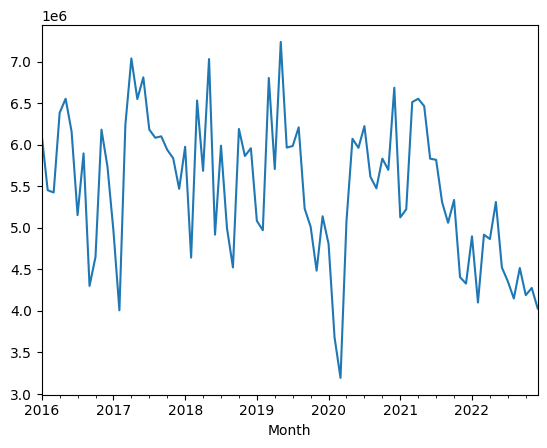

In [13]:
prod.plot()

In [16]:
prod.size

84

In [17]:
prod.describe()

count    8.400000e+01
mean     5.473145e+06
std      8.622616e+05
min      3.193826e+06
25%      4.912158e+06
50%      5.544591e+06
75%      6.103642e+06
max      7.235867e+06
Name: Production/Kg, dtype: float64

In [18]:
prod_ma = prod.rolling(window=10).mean()

<Axes: xlabel='Month'>

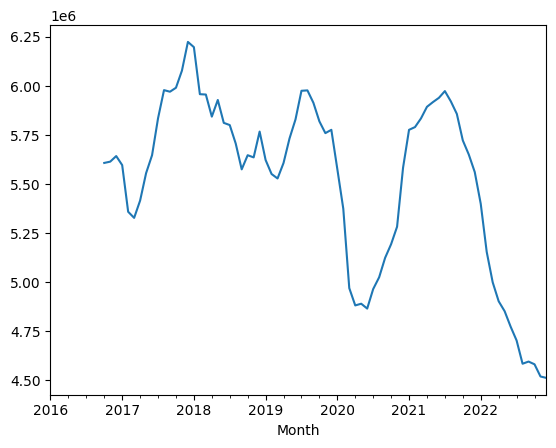

In [19]:
prod_ma.plot()

In [20]:
prod

Month
2016-01-01    6114284.0
2016-02-01    5452146.0
2016-03-01    5424558.0
2016-04-01    6383458.0
2016-05-01    6552106.0
                ...    
2022-08-01    4149531.0
2022-09-01    4516375.0
2022-10-01    4189250.0
2022-11-01    4275937.0
2022-12-01    4028472.0
Name: Production/Kg, Length: 84, dtype: float64

In [21]:
prod_base = pd.concat([prod,prod.shift(1)],axis=1)

In [22]:
prod_base

,Production/Kg,Production/Kg
Month,,
2016-01-01,6114284.0,NaN
2016-02-01,5452146.0,6114284.0
2016-03-01,5424558.0,5452146.0
2016-04-01,6383458.0,5424558.0
2016-05-01,6552106.0,6383458.0
...,...,...
2022-08-01,4149531.0,4355337.0
2022-09-01,4516375.0,4149531.0
2022-10-01,4189250.0,4516375.0


In [24]:
prod_base.columns = ['Actual_Products','Forecast_Products']

In [25]:
prod_base.head()

,Actual_Products,Forecast_Products
Month,,
2016-01-01,6114284.0,NaN
2016-02-01,5452146.0,6114284.0
2016-03-01,5424558.0,5452146.0
2016-04-01,6383458.0,5424558.0
2016-05-01,6552106.0,6383458.0


In [27]:
prod_base.dropna(inplace=True)

In [28]:
prod_base

,Actual_Products,Forecast_Products
Month,,
2016-02-01,5452146.0,6114284.0
2016-03-01,5424558.0,5452146.0
2016-04-01,6383458.0,5424558.0
2016-05-01,6552106.0,6383458.0
2016-06-01,6156702.0,6552106.0
...,...,...
2022-08-01,4149531.0,4355337.0
2022-09-01,4516375.0,4149531.0
2022-10-01,4189250.0,4516375.0


In [29]:
prod_base.head()

,Actual_Products,Forecast_Products
Month,,
2016-02-01,5452146.0,6114284.0
2016-03-01,5424558.0,5452146.0
2016-04-01,6383458.0,5424558.0
2016-05-01,6552106.0,6383458.0
2016-06-01,6156702.0,6552106.0


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
prod_error = mean_squared_error(prod_base.Actual_Products,prod_base.Forecast_Products)

In [32]:
prod_error

741857656697.3011

In [33]:
np.sqrt(prod_error)

861311.5909456351

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

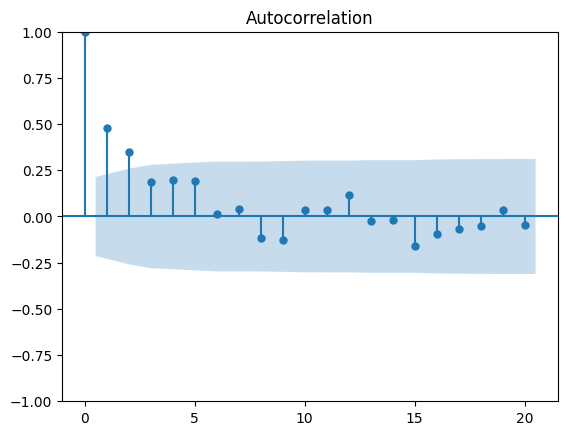

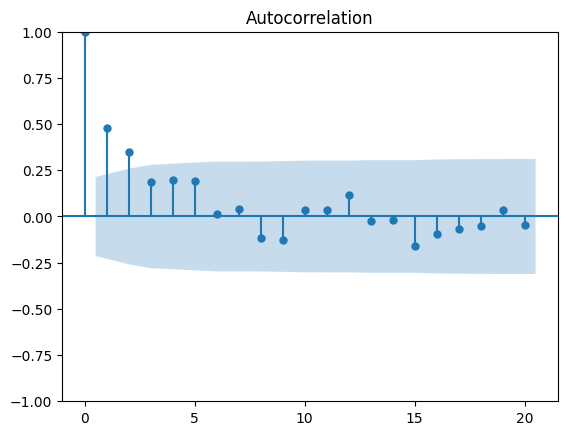

In [35]:
plot_acf(prod)

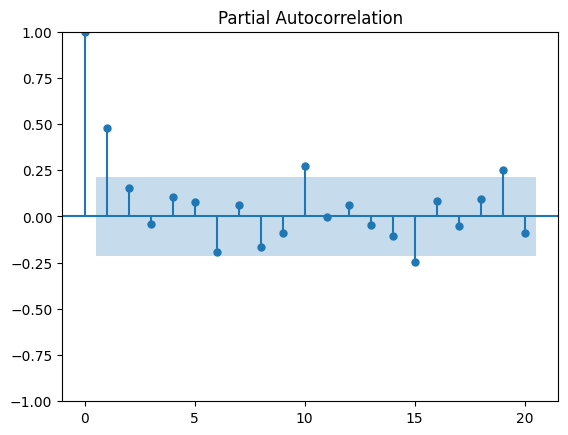

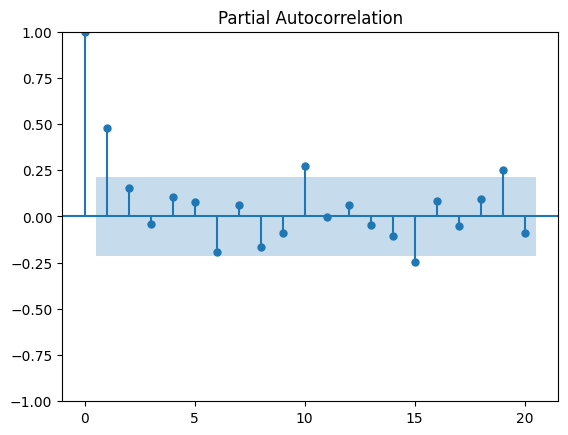

In [36]:
# q = 2 p = 1 ,d = 0-2
plot_pacf(prod)

In [40]:
from statsmodels.tsa.arima.model import ARIMA


In [41]:
prod_train = prod[0:50]
prod_test = prod[50:85]

In [42]:
prod_model = ARIMA(prod_train,order = (1,1,2))

C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
prod_model_fit =prod_model.fit()

In [44]:
prod_model_fit.aic

1489.2683312657873

In [45]:
prod_forecast = prod_model_fit.forecast(steps=11)[0]

C:\Users\RANASINGHE\AppData\Local\Temp\ipykernel_20960\2122623150.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prod_forecast = prod_model_fit.forecast(steps=11)[0]


In [48]:
np.sqrt(mean_squared_error(prod_test,prod_forecast))

InvalidParameterError: The 'y_pred' parameter of mean_squared_error must be an array-like. Got 4122003.386084019 instead.

In [49]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = prod[0:50],prod[50:85]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s MSE = %.2f'% (order,error))
                except:
                    continue